<a href="https://colab.research.google.com/github/Aleph-GORY/calculus_labs/blob/main/2021-05-28_SumaRiemann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cálculo diferencial e Integral 4
####2021/05/28 - Sumas de Riemann

In [39]:
import numpy as np
import time
from matplotlib import pyplot as plt

La integral de Riemann para funciones de $\mathbb{R}^n$ en $\mathbb{R}$ utiliza las $n$-celdas cerradas como medio de aproximación.

Una $n$-celda cerrada es por definición el producto cartesiano de $n$ intervalos cerrados del conjunto de los números reales, en este sentido, generalizan a los intervalos cerrados de $\mathbb{R}$.

In [40]:
class Celda(object):
  def __init__(self, componentes):
    self.dimen = len(componentes)
    self.componentes = componentes
    self.contenido = self.calcula_contenido()

  def calcula_contenido(self):
    contenido = 1
    for componente in self.componentes:
      contenido = contenido * (componente[1] - componente[0])
    return contenido

In [41]:
# A es la celda [0,2]X[0,1]
A = Celda([[0,2],[0,1]])

Método para generar la matriz $\mathcal{M}$ cuya entrada $(i,j)$ corresponde con el centro de la celda $C_{i,j}$ de la partición regular en $n\times n$ trozos de la $2$-celda A

In [42]:
def calcula_M(A, n):
  # Obtener los intervalos componentes
  Ix = A.componentes[0]
  Iy = A.componentes[1]
  deltax = (Ix[1] - Ix[0])/n
  deltay = (Iy[1] - Iy[0])/n
  contenido = deltax*deltay
  # p es el centro de la celda 1,1 de la partición
  p = [Ix[0]+deltax/2, Iy[0]+deltay/2]
  # Creamos la matriz de n,n con los centros de las celdas
  M = []
  for i in range(n):
    renglon = []
    for j in range(n):
      renglon.append([p[0]+i*deltax, p[1]+j*deltay])
    M.append(renglon)
  return M, contenido

In [43]:
# Prueba para calcula_M
A = Celda([[0,1], [2,4]])
M, cont = calcula_M(A, 2)
# Esto solo es para imprimir bonito la matriz
for renglon in M:
  s = ''
  for punto in renglon:
    s += '(' + str(punto[0]) + ', ' + str(punto[1]) + ')   '
  print(s)
print('El contenido de la celda es', cont)

(0.25, 2.5)   (0.25, 3.5)   
(0.75, 2.5)   (0.75, 3.5)   
El contenido de la celda es 0.5


Este método calcula la suma de Riemann de $f$ sobre la celda $A$, con los puntos medios de la matriz $M$.

In [44]:
def suma_Riemann(f, A, n):
  M, cont = calcula_M(A, n)
  suma = 0
  for r in M:
    for e in r:
      suma += f(e)
  return suma * cont

In [45]:
# Prueba de suma_Riemann con el ejemplo de la clase pasada
def f(p):
  x, y = p[0], p[1]
  return x**2 * y
A = Celda([[0,2],[0,1]])
n = 1000

aprox_integral = suma_Riemann(f, A, n)

print('La aproximación de la integral con Suma de Riemann con n igual a', n,'es:')
print(aprox_integral)

La aproximación de la integral con Suma de Riemann con n igual a 1000 es:
1.3333330000000385


El valor exacto de esta integral es

$$\int_{A}f = \int_0^2\int_0^1x^2 y\,dy\,dx = \frac{1}{2}\int_0^2 x^2\,dx =  \frac{1}{2}\frac{8}{3} = \frac{4}{3}$$

**¡Nuestra función aproxima correctamente la integral!** 

Más aún el teorema de las sumas de Riemann nos asegura que cuanto mayor sea $n$, mejor aproximaremos la integral.
*¿Pero es esto posible?*

A continuación se muestra una gráfica del tiempo que tarda el método suma_Riemann(), en función del tamaño de la partición regular $n$



In [46]:
tiempos = []
step = 500
max_n = 5000
axis = range(step, max_n, step)
for x in axis:
  tic = time.time()
  aprox = suma_Riemann(f, A, x)
  toc = time.time()
  tiempos.append(toc-tic)

<function matplotlib.pyplot.show>

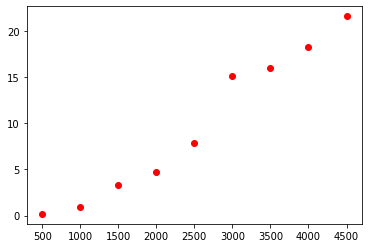

In [47]:
plt.plot(axis, tiempos, 'ro')
plt.show

Se observa que el tiempo varía cuadráticamente en función del tamño de la entrada, y también se observa que para $n>1500$, $t_n > 20s$.

¿Podemos hacerlo más rápidamente?

Usemos la librería de cómputo Numpy para optimizar la función suma_Riemann()

In [48]:
def suma_Riemann_np(f, A, n):
  Ix = A.componentes[0]
  Iy = A.componentes[1]
  deltax = (Ix[1] - Ix[0])/n
  deltay = (Iy[1] - Iy[0])/n
  contenido = deltax*deltay
  p = [Ix[0]+deltax/2, Iy[0]+deltay/2]

  M = np.fromfunction(
      lambda i,j: f([p[0]+i*deltax, p[1]+j*deltay]),
      (n,n),
      dtype=np.longdouble
  )
  return M.sum()*contenido

In [49]:
aprox_integral = suma_Riemann_np(f, A, n)

print('La aproximación de la integral con Suma de Riemann usando Numpy con n igual a', n,'es:')
print(aprox_integral)

La aproximación de la integral con Suma de Riemann usando Numpy con n igual a 1000 es:
1.3333330000000000227


Hagamos la misma gráfica de tiempo vs entrada con la nueva función. 

In [50]:
tiempos_np = []
for x in axis:
  tic = time.time()
  aprox = suma_Riemann_np(f, A, x)
  toc = time.time()
  tiempos_np.append(toc-tic)

<function matplotlib.pyplot.show>

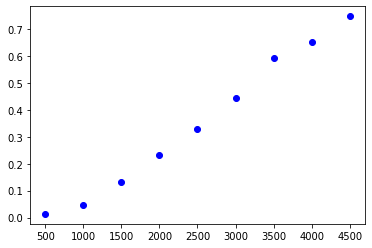

In [51]:
plt.plot(axis, tiempos_np, 'bo')
plt.show

A pesar de comportarse cuadráticamente, esta solución presenta una mejora en la velocidad importante, el primer método tardaba más de $20s$ para manejar una entrada con $n= 4500$ mientras que la implementación con numpy tarda $0.7s$ aproximadamente.

La diferencia es más clara si vemos la siguiente gráfica.

<function matplotlib.pyplot.show>

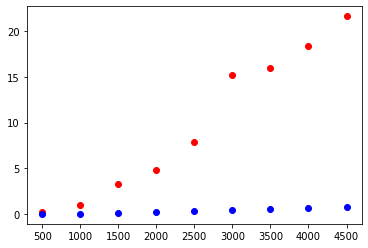

In [52]:
plt.plot(axis, tiempos, 'ro', axis, tiempos_np, 'bo')
plt.show

#Ejercicios


1.   Calcula con el *Teorema de Fubini* y con la función suma_Riemann_np la integral $\int_A f$ donde:
  *   $A = [5,6]\times [-3,1]$ y $f(x,y) = \sin(x)\cos(y)$
  *   $A = [-11.45,-7.68]\times [0,1000]$ y $f(x,y) = \pi x^4+xy+e y^6$


2.   Investiga sobre las funciones *np.fromfunction* y *np.sum* usadas en la función suma_Riemann_np.

